# K-Nearest Neighbors
* Given a point, KNN finds the k nearest points from the training data and generates a prediction using the neighbors' target values. Since KNN is a distance based function, standard scaling is highly recommended to avoid weighing features on different scales. 

Best K: 7
Accuracy: 0.93
F1: 0.93
Precision: 0.93
Recall: 0.94


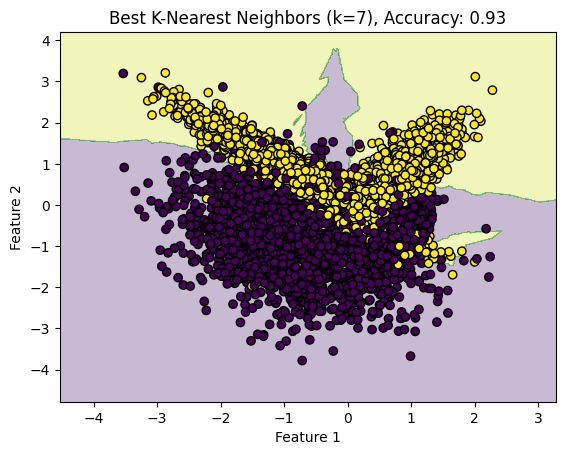

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, auc

In [6]:
# Generate some example data
X, y = make_classification(n_samples = 10000, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 42)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

In [14]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': np.arange(1, 21)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best KNN model from grid search
best_knn = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_knn.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Best K: {best_knn.n_neighbors}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Best K: 7
Accuracy: 0.93
F1: 0.93
Precision: 0.93
Recall: 0.94


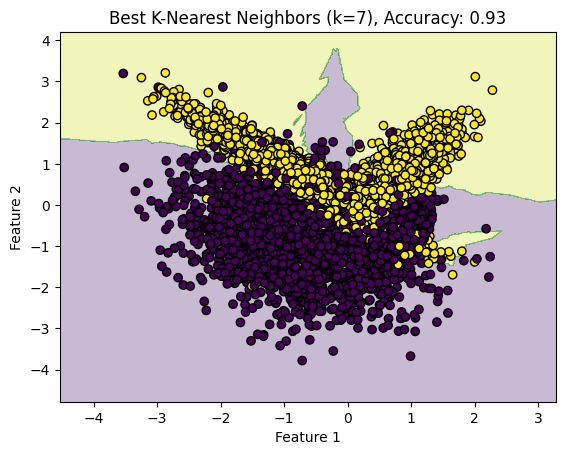

In [15]:
# Plot the decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, marker='o', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Best K-Nearest Neighbors (k={best_knn.n_neighbors}), Accuracy: {accuracy:.2f}')
plt.show()